In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as linreg
from sklearn.model_selection import train_test_split as ttsplit
from sklearn.metrics import mean_squared_error as mserror
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
housing = pd.read_csv('AmesHousing.csv')

In [39]:
def create_regression_ai(x_axis, y_axis):

    # Extract the independent and dependent variables (replace with your actual column names)
    x = housing[x_axis].values.reshape(-1, 1)  # Feature (input)
    y = housing[y_axis].values  # Target (output)

    #Split data into training and testing sets
    x_train, x_test, y_train, y_test = ttsplit(x, y, test_size=0.2, random_state=42)

    # Create and train the model
    model = linreg()
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test)

    # Evaluate the model
    mse = mserror(y_test, y_pred)
    r_squared = model.score(x_test, y_test)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r_squared}")

    sorted_indices = np.argsort(y_test)  # Get indices to sort y_test in increasing order
    sorted_y_test = y_test[sorted_indices]  # Actual values sorted
    sorted_y_pred = y_pred[sorted_indices]  # Corresponding predicted values sorted

    plt.figure(figsize=(8, 8))

    plt.figure(figsize=(12, 6))

    #sorted_indices = np.argsort(y_test)  # Get indices to sort y_test in increasing order
    sorted_y_test = y_test[sorted_indices]  # Actual values sorted
    sorted_y_pred = y_pred[sorted_indices]  # Corresponding predicted values sorted

    # Plot the results
    plt.figure(figsize=(12, 6))

    # Plot the sorted actual values
    plt.plot(sorted_y_test, label='Actual Values', color='blue', marker='o', linestyle='-', markersize=5)

    # Plot the sorted predicted values
    plt.plot(sorted_y_pred, label='Predicted Values', color='red', marker='x', linestyle='', markersize=5)

    # Add labels and title
    plt.xlabel('Data Points (Sorted)')
    plt.ylabel('Values')
    plt.title('Comparison of Actual vs. Predicted Values')
    plt.legend()

    # Show the plot
    plt.show()

Mean Squared Error: 2796154624.8908944
R-squared: 0.651245661518071


<Figure size 800x800 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

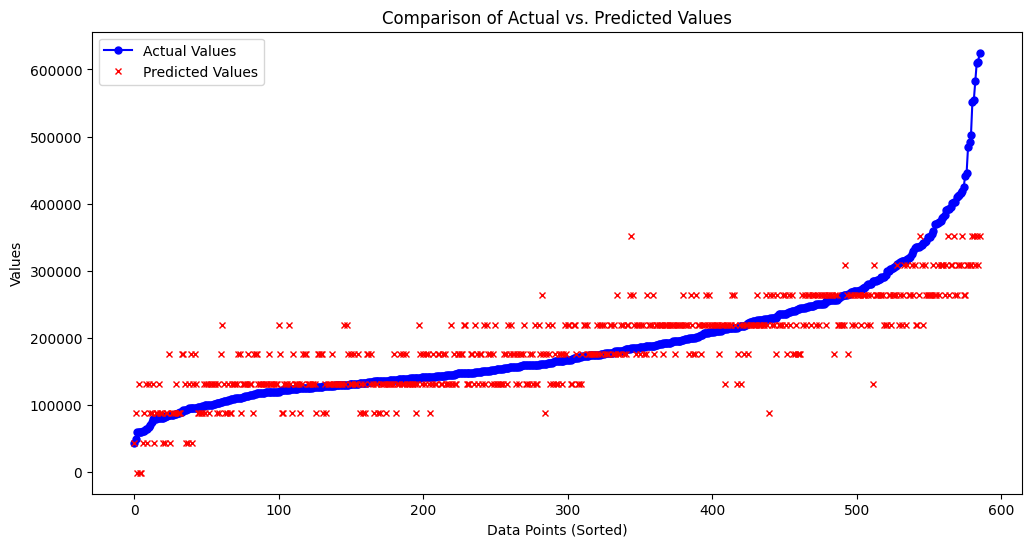

In [40]:
create_regression_ai('Overall Qual', 'SalePrice')

The graph above demonstrates the result of treating a classification model as a regression model. Although the overal quallity is represented as an int in the csv, it is more accurarte to consider it 9 distinct categories than a scale since there are so few values for the AI to work with.

Mean Squared Error: 5284337219.53288
R-squared: 0.34090356988553994


<Figure size 800x800 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

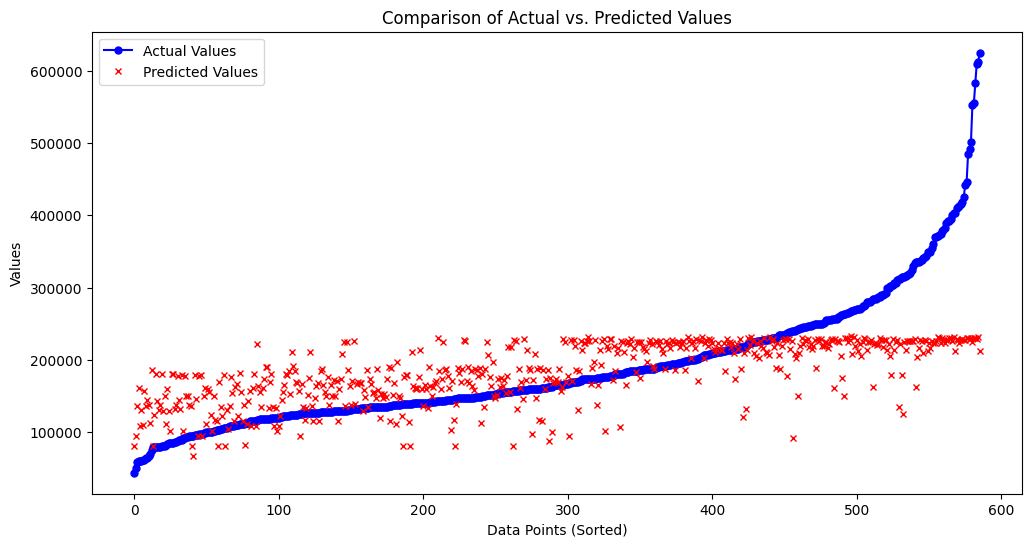

In [42]:
create_regression_ai('Year Built', 'SalePrice')

Mean Squared Error: 5471050012.826153
R-squared: 0.31761555278825615


<Figure size 800x800 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

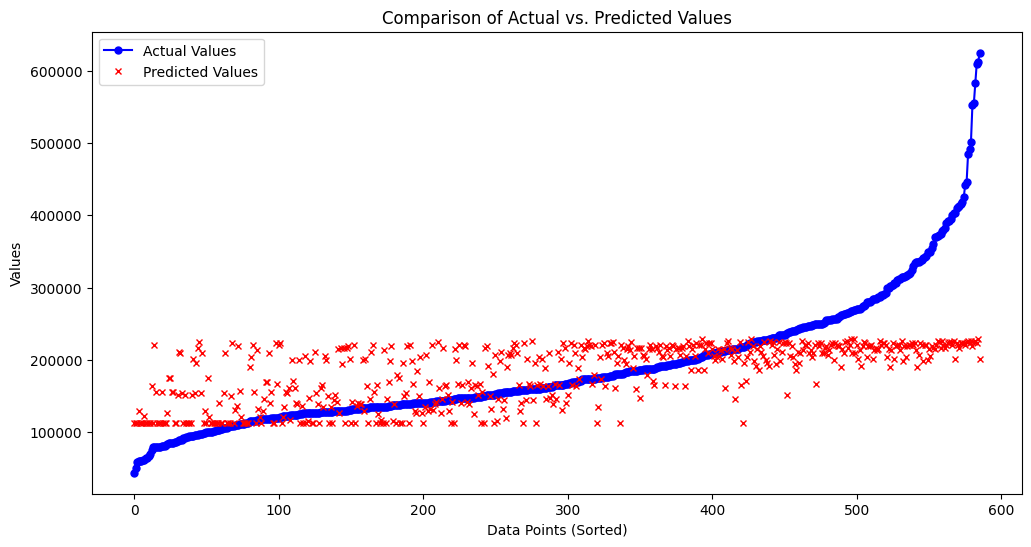

In [43]:
create_regression_ai('Year Remod/Add', 'SalePrice')